In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

### Import the file and check the import

For this EDA, I'm going to add some temporary columns to the df for histograms, etc.  They won't be kept outside of this notebook.

In [2]:
file = os.path.join('..','data','astro_intermediate.csv')

file

'..\\data\\astro_intermediate.csv'

In [3]:
df = pd.read_csv(file, index_col=0)
df.head()

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,sentences
0,We have constructed a Fourier-transform spectr...,"Zhaodi Pan, Mira Liu, Ritoban Basu Thakur, Bra...",Submitted to Applied Optics. [Copyright 2019 O...,Stephan S. Meyer,2019-05-17 17:57:11+00:00,astro-ph.IM,astro-ph.IM|physics.ins-det,A Compact Millimeter-Wavelength Fourier-Transf...,2019-05-17 17:57:11+00:00,http://arxiv.org/abs/1905.07399v1,we construct fourier transform spectrometer ft...,6
1,We report possible interaction between multipl...,"Kazuhito Dobashi, Tomomi Shimoikura, Nobuhiro ...",To appear in the Publications of the Astronomi...,Jean-Philippe Bernard,2019-05-17 17:48:17+00:00,astro-ph.GA,astro-ph.GA,Interaction between Northern Coal Sack in the ...,2019-05-17 17:48:17+00:00,http://arxiv.org/abs/1905.07395v1,we report possible interaction multiple super ...,8
2,"Young, low-mass stars in the solar neighborhoo...","Adam C. Schneider, Evgenya L. Shkolnik, Kately...",Accepted for publication in the Astronomical J...,Laura Flagg,2019-04-15 17:10:00+00:00,astro-ph.SR,astro-ph.SR,ACRONYM III: Radial Velocities for 336 Candida...,2019-05-17 17:39:58+00:00,http://arxiv.org/abs/1904.07193v2,young low mass star solar neighborhood vital c...,9
3,We investigate the energy extraction by the Pe...,Parthapratim Pradhan,Accepted in EPJC,Parthapratim Pradhan,2018-10-08 07:24:04+00:00,gr-qc,gr-qc|astro-ph.HE|hep-th,Study of energy extraction and epicyclic frequ...,2019-05-17 17:32:07+00:00,http://arxiv.org/abs/1810.03290v2,we investigate energy extraction penrose proce...,22
4,We investigate the effect cosmological constan...,"Javad T. Firouzjaee, Alireza Allahyari",No comment found,Alireza Allahyari,2019-05-17 17:14:13+00:00,astro-ph.CO,astro-ph.CO|gr-qc,Black hole shadow with a cosmological constant...,2019-05-17 17:14:13+00:00,http://arxiv.org/abs/1905.07378v1,we investigate effect cosmological constant an...,7


### Time for some visual analysis.  First, how many categories do authors submit each article to?  

I'll split the categories in the 'terms' column on the pipes and count them.

In [4]:
df['terms_len'] = [len(x.split('|')) for x in df.terms]
df.terms_len.describe()

count    49973.000000
mean         1.650731
std          0.876737
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: terms_len, dtype: float64

Max = 7?  That's a huge number of categories.  I'll glance over a few entries as a whole for any obvious errors.  Then I'll check an entry with 7 categories more closely to see if this makes sense.

In [5]:
df.sort_values('terms_len', ascending=False)[:5]

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,sentences,terms_len
4261,Denoising of time domain data is a crucial tas...,"Hongyu Shen, Daniel George, E. A. Huerta, Zhiz...","5 pages, 11 figures and 3 tables, accepted to ...",Zhizhen Zhao,2019-03-06 19:00:02+00:00,astro-ph.CO,astro-ph.CO|astro-ph.IM|cs.LG|eess.SP|gr-qc|97...,Denoising Gravitational Waves with Enhanced De...,2019-03-06 19:00:02+00:00,http://arxiv.org/abs/1903.03105v1,denois time domain datum crucial task applicat...,6,7
4296,We present the first application of deep learn...,"Hongyu Shen, E. A. Huerta, Zhizhen Zhao","8 pages, 4 figures and 4 tables",Zhizhen Zhao,2019-03-05 19:00:02+00:00,gr-qc,"gr-qc|astro-ph.HE|cs.AI|cs.LG|stat.ML|68T10, 8...",Deep Learning at Scale for Gravitational Wave ...,2019-03-05 19:00:02+00:00,http://arxiv.org/abs/1903.01998v1,we present application deep learning scale gra...,7,7
12704,Female role models reduce the impact on women ...,"C. V. Hampton, M. Lugaro, P. Papakonstantinou,...",5 pages; to appear in Springer Proceedings in ...,R. Collet,2018-08-25 13:22:28+00:00,physics.hist-ph,physics.hist-ph|astro-ph.EP|astro-ph.GA|astro-...,Women Scientists Who Made Nuclear Astrophysics,2018-08-25 13:22:28+00:00,http://arxiv.org/abs/1809.01045v1,female role model reduce impact woman stereoty...,4,7
5412,The advent of experimental science facilities-...,"E. A. Huerta, Roland Haas, Shantenu Jha, Mark ...","13 pages, 7 figures. Accepted to Computing and...",Daniel S. Katz,2018-10-06 21:13:01+00:00,cs.DC,cs.DC|astro-ph.HE|gr-qc|hep-ex|hep-ph|hep-th|9...,Supporting High-Performance and High-Throughpu...,2019-02-08 21:03:43+00:00,http://arxiv.org/abs/1810.03056v2,the advent experimental science facility instr...,6,7
8225,From the general assumption that gravity origi...,Hongwei Xiong,Much better presentation has been given in my ...,Hongwei Xiong,2011-01-25 18:31:52+00:00,gr-qc,gr-qc|astro-ph.CO|cond-mat.quant-gas|hep-th|ma...,Abnormal Quantum Gravity Effect: Experimental ...,2018-12-04 12:05:57+00:00,http://arxiv.org/abs/1101.4890v4,from general assumption gravity originate coup...,6,7


In [6]:
df.terms[12704]

'physics.hist-ph|astro-ph.EP|astro-ph.GA|astro-ph.HE|astro-ph.SR|nucl-ex|nucl-th'

In [7]:
df.title[12704]

'Women Scientists Who Made Nuclear Astrophysics'

In [8]:
df.abstract[12704]

"Female role models reduce the impact on women of stereotype threat, i.e., of being at risk of conforming to a negative stereotype about one's social, gender, or racial group. This can lead women scientists to underperform or to leave their scientific career because of negative stereotypes such as, not being as talented or as interested in science as men. Sadly, history rarely provides role models for women scientists; instead, it often renders these women invisible. In response to this situation, we present a selection of twelve outstanding women who helped to develop nuclear astrophysics."

Well, it makes sense for this article.  You can also see some weird five-digit codes like 97R40 or 68T10.  These are "Mathematical Subject Classifications," and authors can classify their papers with them, as well as the subject codes.  Either way, it isn't a problem with the notebook code, so we're good to go.  

Next, how does this distribution look?  We already know from the .describe() above that more than half of the papers are only submitted to one category and three-quarters are submitted to two or fewer, with a mean of about 1.6 categories.

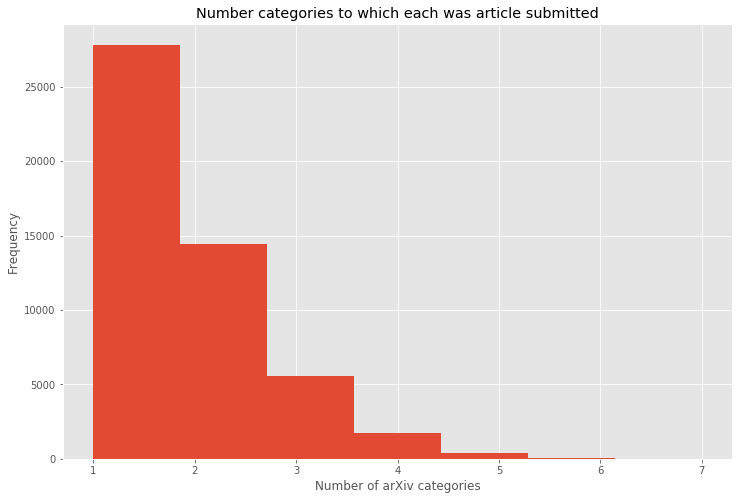

In [9]:
_ = plt.figure(figsize=(12,8))
_ = df.terms_len.plot(kind='hist', bins=7)
_ = plt.xlabel('Number of arXiv categories')
_ = plt.title('Number categories to which each was article submitted')

One more category question: Which are the most popular categories?  How are submissions distributed?

In [10]:
cat_counts = pd.DataFrame.from_records([{
    'cosmology' : len(df.terms.loc[df.terms.str.contains('astro-ph.CO')]),
    'planetary' : len(df.terms.loc[df.terms.str.contains('astro-ph.EP')]),
    'galaxies' : len(df.terms.loc[df.terms.str.contains('astro-ph.GA')]),
    'high_energy' : len(df.terms.loc[df.terms.str.contains('astro-ph.HE')]),
    'instrument' : len(df.terms.loc[df.terms.str.contains('astro-ph.IM')]),
    'solar' : len(df.terms.loc[df.terms.str.contains('astro-ph.SR')])
}]).T.reset_index()

cat_counts.columns=['astro-ph category','article count']

cat_counts

,astro-ph category,article count
0,cosmology,11252
1,galaxies,15858
2,high_energy,12041
3,instrument,5976
4,planetary,6170
5,solar,12107


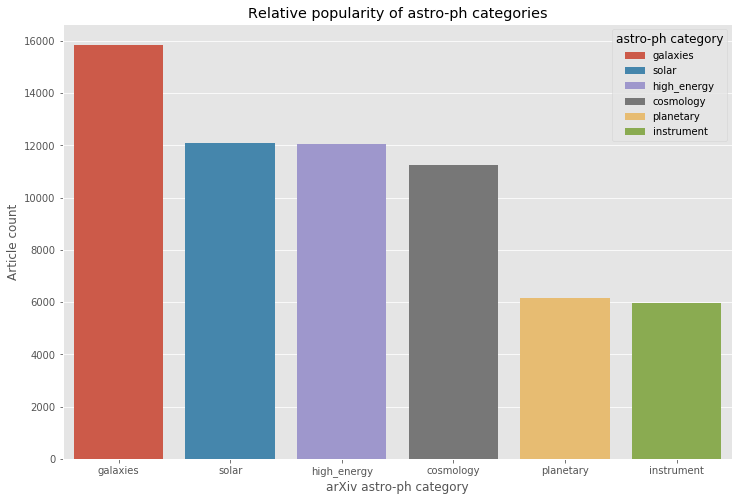

In [11]:
cat_counts = cat_counts.sort_values(by='article count', ascending=False)

_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='astro-ph category', y='article count', hue='astro-ph category', data=cat_counts, dodge=False)
_ = plt.xlabel('arXiv astro-ph category')
_ = plt.ylabel('Article count')
_ = plt.title('Relative popularity of astro-ph categories')

### Now on to the abstract lengths

In [12]:
df['sentences'] = [(entry.count('. ') + 1) for entry in df.abstract]
df.sentences.describe()

count    49973.000000
mean         7.750185
std          2.805857
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         31.000000
Name: sentences, dtype: float64

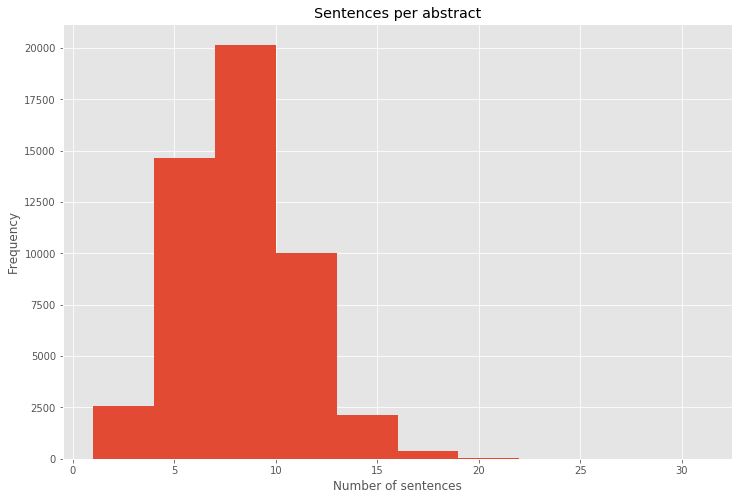

In [13]:
_ = plt.figure(figsize=(12,8))
_ = df.sentences.plot(kind='hist')
_ = plt.xlabel('Number of sentences')
_ = plt.ylabel('Frequency')
_ = plt.title('Sentences per abstract')

### And now, the statistics on the dataset:

In [14]:
df.describe(include='all')

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,sentences,terms_len
count,49973,49973,49973,49973,49973,49973,49973,49973,49973,49973,49973,49973.000000,49973.000000
unique,49973,45911,36808,26132,47676,83,2223,49942,48992,49973,49971,NaN,NaN
top,In the present work we used five different ver...,Shahar Hod,No comment found,Abraham Loeb,2017-12-11 19:00:13+00:00,astro-ph.GA,astro-ph.GA,Fast Radio Bursts,2019-01-22 19:00:00+00:00,http://arxiv.org/abs/1606.05603v1,evidence local single source cosmic ray amass ...,NaN,NaN
freq,1,43,3159,106,8,12027,8438,3,6,1,2,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.750185,1.650731
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.805857,0.876737
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,2.000000
